Pandas is the most prominent Python library for exploratory data analysis (EDA). The functions Pandas supports are integral to understanding, formatting, and preparing our data. Formally, we use Pandas to investigate, wrangle, munge, and clean our data. Pandas is the Swiss Army Knife of data manipulation!


We'll have two coding-heavy sessions on Pandas. In this one, we'll use Pandas to:
 - Read in a dataset
 - Investigate a dataset's integrity
 - Filter, sort, and manipulate a DataFrame's series

## About the Dataset: Adventureworks Cycles

<img align="right" src="http://lh6.ggpht.com/_XjcDyZkJqHg/TPaaRcaysbI/AAAAAAAAAFo/b1U3q-qbTjY/AdventureWorks%20Logo%5B5%5D.png?imgmax=800">

For today's Pandas exercises, we will be using a dataset developed by Microsoft for training purposes in SQL server, known the [Adventureworks Cycles 2014OLTP Database](https://github.com/Microsoft/sql-server-samples/releases/tag/adventureworks). It is based on a fictitious company called Adventure Works Cycles (AWC), a multinational manufacturer and seller of bicycles and accessories. The company is based in Bothell, Washington, USA and has regional sales offices in several countries. We will be looking at a single table from this database, the Production.Product table, which outlines some of the products this company sells. 

A full data dictionary can be viewed [here](https://www.sqldatadictionary.com/AdventureWorks2014/).


Let's take a closer look at the Production.Product table [data dictionary](https://www.sqldatadictionary.com/AdventureWorks2014/Production.Product.html), which is a description of the fields (columns) in the table (the .csv file we will import below):
- **ProductID** - Primary key for Product records.
- **Name** - Name of the product.
- **ProductNumber** - Unique product identification number.
- **MakeFlag** - 0 = Product is purchased, 1 = Product is manufactured in-house.
- **FinishedGoodsFlag** - 0 = Product is not a salable item. 1 = Product is salable.
- **Color** - Product color.
- **SafetyStockLevel** - Minimum inventory quantity.
- **ReorderPoint** - Inventory level that triggers a purchase order or work order.
- **StandardCost** - Standard cost of the product.
- **ListPrice** - Selling price.
- **Size** - Product size.
- **SizeUnitMeasureCode** - Unit of measure for the Size column.
- **WeightUnitMeasureCode** - Unit of measure for the Weight column.
- **DaysToManufacture** - Number of days required to manufacture the product.
- **ProductLine** - R = Road, M = Mountain, T = Touring, S = Standard
- **Class** - H = High, M = Medium, L = Low
- **Style** - W = Womens, M = Mens, U = Universal
- **ProductSubcategoryID** - Product is a member of this product subcategory. Foreign key to ProductSubCategory.ProductSubCategoryID.
- **ProductModelID** - Product is a member of this product model. Foreign key to ProductModel.ProductModelID.
- **SellStartDate** - Date the product was available for sale.
- **SellEndDate** - Date the product was no longer available for sale.
- **DiscontinuedDate** - Date the product was discontinued.
- **rowguid** - ROWGUIDCOL number uniquely identifying the record. Used to support a merge replication sample.
- **ModifiedDate** - Date and time the record was last updated.


## Importing Pandas

To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
# we can see the details about the imported package by referencing its private class propertys:
print(f'I am using {pd.__name__} \
Version: {pd.__version__}.\n\
It is installed at: {pd.__path__}')

I am using pandas Version: 0.24.2.
It is installed at: ['//anaconda3/lib/python3.7/site-packages/pandas']


## Reading in Data

Pandas dramatically simplifies the process of reading in data. When we say "reading in data," we mean loading a file into our machine's memory.

When you have a CSV, for example, and then you double-click to open it in Microsoft Excel, the open file is "read into memory." You can now manipulate the CSV.

When we read data into memory in Python, we are creating an object. We will soon explore this object. _(And, as an aside, when we have a file that is greater than the size of our computer's memory, this is approaching "Big Data.")_

Because we are working with a CSV, we will use the [read CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method.<br>A [delimiter](https://en.wikipedia.org/wiki/Delimiter-separated_values) is a character that separates fields (columns) in the imported file. Just because a file says `.csv` does not necessarily mean that a comma is used as the delimiter. In this case, we have a tab character as the delimiter for our columns, so we will be using `sep='\t'` to tell pandas to 'cut' the columns every time it sees a [tab character in the file](http://vim.wikia.com/wiki/Showing_the_ASCII_value_of_the_current_character).

In [ ]:
prod = pd.read_csv('../data/Production.Product.csv', sep='\t')

In [ ]:
prod.head(1)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000


*Documentation Pause*

How did we know how to use `pd.read_csv`? Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). Note the first argument required (`filepath`).
> Take a moment to dissect other arguments and options when reading in data.

We have just created a data structure called a `DataFrame`. See?

In [ ]:
type(prod)

pandas.core.frame.DataFrame

## Inspecting our DataFrame: The basics

We'll now perform basic operations on the DataFrame, denoted with comments.

In [ ]:
# print the first and last 3 rows
prod.head(3)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


Notice that `.head()` is a method (denoted by parantheses), so it takes arguments.

**Class Question:** 
- What do you think changes if we pass a different number `head()` argument?
- How would we print the last 5 rows?

In [ ]:
# identify the shape (rows by columns)
prod.shape

(504, 25)

Here we have 504 rows, and 25 columns. This is a tuple, so we can extract the parts using indexing:

In [ ]:
# print the number of rows
prod.shape[0]

504

## Using the index
An [index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html) is an immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all pandas objects. Think of it as a 'row address' for your data frame (table). It is best practice to explicitly set the index of your dataframe, as these are commonly used as [primary keys](https://en.wikipedia.org/wiki/Primary_key) which can be used to [join](https://www.w3schools.com/sql/sql_join.asp) your dataframe to other dataframes.

The dataframe can store different types (int, string, datetime), and when importing data will automatically assign a number to each row, starting at zero and counting up. You can overwrite this, which is what we are going to do.

In [ ]:
# displaying the index as it sits (auto-generated upon import)
prod.index

RangeIndex(start=0, stop=504, step=1)

In [ ]:
# also note that our auto-generated index has no name
print(prod.index.name)

None


In [ ]:
# Here we are looking at three columns;
# the one on the left is the index (automatically generated upon import by pandas)
# 'ProductID' is our PK (primary key) from our imported table. 'Name' is a data column.
# Notice that the generated index starts at zero and our PK starts at 1.
pd.DataFrame(prod.head(3)[['ProductID', 'Name']])

,ProductID,Name
0,1,Adjustable Race
1,2,Bearing Ball
2,3,BB Ball Bearing


In [ ]:
# Setting the index overwrites the automatically generated index
# with our PK, which resided in the 'ProductID' column.
prod.set_index('ProductID', inplace=True)
prod.head(3)[['Name']]

,Name
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing


In [ ]:
# Note how our index property has changed as a result
prod.index

Int64Index([  1,   2,   3,   4, 316, 317, 318, 319, 320, 321,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', name='ProductID', length=504)

In [ ]:
# And our index has also inherited the name of our 'ProductID' column
print(prod.index.name)

ProductID


## Column headers and datatypes

In [ ]:
# print the columns
prod.columns

Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [ ]:
# examine the datatypes of the columns
# note that these were automatically inferred by pandas upon import!
pd.DataFrame(prod.dtypes, columns=['DataType'])

,DataType
Name,object
ProductNumber,object
MakeFlag,int64
FinishedGoodsFlag,int64
Color,object
SafetyStockLevel,int64
ReorderPoint,int64
StandardCost,float64
ListPrice,float64
Size,object


**Class Question:** Why do datatypes matter? What operations could we perform on some datatypes that we could not on others? Note the importance of this in checking dataset integrity.

## Selecting a Column

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

In [ ]:
print('If I use SINGLE brackets, pandas returns a', 
      type(prod['Name']),
      '\nIf I use DOUBLE brackets, pandas returns a',
      type(prod[['Name']]))

If I use SINGLE brackets, pandas returns a <class 'pandas.core.series.Series'> 
If I use DOUBLE brackets, pandas returns a <class 'pandas.core.frame.DataFrame'>


In [ ]:
# select the Name column, Series object
prod['Name'].head(3)

ProductID
1    Adjustable Race
2       Bearing Ball
3    BB Ball Bearing
Name: Name, dtype: object

In [ ]:
# select the Name column, DataFrame object
prod[['Name']].head(3)

,Name
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing


In [ ]:
# selecting > 1 column (must use double brackets!)
prod[['Name', 'ProductNumber']].head(3)

,Name,ProductNumber
ProductID,,
1,Adjustable Race,AR-5381
2,Bearing Ball,BA-8327
3,BB Ball Bearing,BE-2349


**Class Question:** What if we wanted to select a column that has a space in it? Which method from the above two would we use? Why?

## Renaming Columns

Perhaps we want to rename our columns. There are a few options for doing this.

Renaming **specific** columns by using a dictionary:

In [ ]:
# rename one or more columns with a dictionary. Note: inplace=False will return a new dataframe,
# but leave the original dataframe untouched. Change this to True to modify the original dataframe.
prod.rename(columns={'Name': 'ProductName', 'ProductNumber':'Number'}, inplace=False).head(3)

,ProductName,Number,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


Renaming **ALL** columns with a new list of column names.

Note that the `pd.DataFrame.columns` property can be cast to a `list` type. Originally, it's a `pd.core.indexes.base.Index` object:

In [ ]:
print('My columns look like:\n', prod.columns)
print('\nAnd the type is:\n', type(prod.columns))

My columns look like:
 Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

And the type is:
 <class 'pandas.core.indexes.base.Index'>


We can explicitly cast these to a list object as such, by using the built-in `list()` function:

In [ ]:
print('Now my columns look like:\n', list(prod.columns))
print('\nAnd are of type:\n', type(list(prod.columns)))

Now my columns look like:
 ['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate']

And are of type:
 <class 'list'>


We can place these columns into a variable, `cols`:

In [ ]:
# declare a list of strings - these strings will become the new column names
cols = list(prod.columns)
print(cols)

['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate']


We can use list indexing to mutate the columns we want:

In [ ]:
cols[0] = 'NewName'
print(cols)

['NewName', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate']


Finally, we can set the `pd.DataFrame.columns` property (this is a settable class property), to the new `cols` list, overwriting the existing columns header names:

In [ ]:
# Note that our first column name has changed from 'Name' to 'NewName'
prod.columns = cols
print(prod.columns)

Index(['NewName', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')


In [ ]:
prod.head(3)[['NewName']]

,NewName
ProductID,
1,Adjustable Race
2,Bearing Ball
3,BB Ball Bearing


## Common Column Operations

While this is non-comprehensive, these are a few key column-specific data checks.


**Descriptive statistics:**  the minimum, first quartile, median, third quartile, and maximum.

(And more! The mean too.)

Five Number Summary (all assumes numeric data):
- **Min:** The smallest value in the column
- **Max:** The largest value in the column
- **Quartile:** A quartile is one fourth of our data
    - **First quartile:** This is the bottom most 25 percent
    - **Median:** The middle value. (Line all values biggest to smallest - median is the middle!) Also the 50th percentile
    - **Third quartile:** This the the top 75 percentile of our data


![](https://www.mathsisfun.com/data/images/quartiles-a.svg)

In [ ]:
# note - describe *default* only checks numeric datatypes
prod[['MakeFlag', 'SafetyStockLevel', 'StandardCost']].describe()

,MakeFlag,SafetyStockLevel,StandardCost
count,504.000000,504.000000,504.000000
mean,0.474206,535.150794,258.602961
std,0.499830,374.112954,461.632808
min,0.000000,4.000000,0.000000
25%,0.000000,100.000000,0.000000
50%,0.000000,500.000000,23.372200
75%,1.000000,1000.000000,317.075825
max,1.000000,1000.000000,2171.294200


**Value Counts:** `pd.Series.value_counts()` count the occurrence of each value within our series.

In [ ]:
# show the most popular product colors (aggregated by count, descending by default)
prod['Color'].value_counts()

Black           93
Silver          43
Red             38
Yellow          36
Blue            26
Multi            8
Silver/Black     7
White            4
Grey             1
Name: Color, dtype: int64

**Unique values:** Determine the number of distinct values within a given series.

In [ ]:
# What are the unique colors for the products?
prod['Color'].unique()

array([nan, 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

In [ ]:
# HOW MANY distinct colors are there?
prod['Color'].nunique()

9

In [ ]:
# We can also include nulls with .nunique() as such:
prod['Color'].nunique(dropna=False)

10

## Filtering on a Single Condition

Filtering and sorting are key processes that allow us to drill into the 'nitty gritty' and cross sections of our dataset.

To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition, and use that Boolean condition to filer on our DataFrame.

Recall: our given dataset has a column `Color`. Let's see if we can find all products that are `Black`. Let's take a look at the first 10 rows of the dataframe to see how it looks as-is:

In [ ]:
prod['Color'].head(10)

ProductID
1         NaN
2         NaN
3         NaN
4         NaN
316       NaN
317     Black
318     Black
319     Black
320    Silver
321    Silver
Name: Color, dtype: object

By applying a `boolean mask` to this dataframe, `== 'Black'`, we can get the following:

In [ ]:
prod['Color'].head(10) == 'Black'

ProductID
1      False
2      False
3      False
4      False
316    False
317     True
318     True
319     True
320    False
321    False
Name: Color, dtype: bool

Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where `Color` is `Black`:

In [ ]:
prod[prod['Color'] == 'Black'].head(3)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0,0.0,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0,0.0,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000


Let's calculate the **average ListPrice** for the **salable products**.

> Think: What are the component parts of this problem?

In [ ]:
# First, we need to get salable items. Use your data dictionary from the beginning of this lesson.
prod[prod['FinishedGoodsFlag'] == 1].head(3)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
706,"HL Road Frame - Red, 58",FR-R92R-58,1,1,Red,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{9540FF17-2712-4C90-A3D1-8CE5568B2462},2014-02-08 10:01:36.827000000
707,"Sport-100 Helmet, Red",HL-U509-R,0,1,Red,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712},2014-02-08 10:01:36.827000000


Now, we need to find average list price of those above items. Let's just get the 'ListPrice' column for starters.

In [ ]:
prod[prod['FinishedGoodsFlag'] == 1]['ListPrice'].head(3)

ProductID
680    1431.50
706    1431.50
707      34.99
Name: ListPrice, dtype: float64

To get the average of that column, just take `.mean()`

In [ ]:
prod[prod['FinishedGoodsFlag'] == 1]['ListPrice'].mean()

744.595220338982

We can take a shortcut and just use `.describe()` here:

In [ ]:
prod[prod['FinishedGoodsFlag'] == 1]['ListPrice'].describe()

count     295.000000
mean      744.595220
std       892.563172
min         2.290000
25%        66.745000
50%       337.220000
75%      1100.240000
max      3578.270000
Name: ListPrice, dtype: float64

**Sneak peek**: Another handy trick is to use `.hist()` to get a distribution of a continuous variable - in this case, `ListPrice`. We'll cover this more in future lessons:

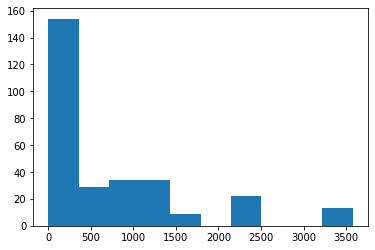

In [ ]:
prod[prod['FinishedGoodsFlag'] == 1]['ListPrice'].hist(grid=False, bins=10)

## Filtering on Multiple Conditions

Here, we will filter on _multiple conditions_. Before, we filtered on rows where Color was Black. We also filtered where FinishedGoodsFlag was equal to 1. Let's see what happens when we filter on *both* simultaneously. 

The format for multiple conditions is:

`df[ (df['col1'] == value1) & (df['col2'] == value2) ]`

Or, more simply:

`df[ (CONDITION 1) & (CONDITION 2) ]`

Which eventually may evaluate to something like:

`df[ True & False ]`

...on a row-by-row basis. If the end result is `False`, the row is omitted.

_Don't forget parentheses in your conditions!_ This is a common mistake.

In [ ]:
# Let's look at a table where Color is Black, and FinishedGoodsFlag is 1
prod[ (prod['Color'] == 'Black') & (prod['FinishedGoodsFlag'] == 1) ].head(3)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
708,"Sport-100 Helmet, Black",HL-U509,0,1,Black,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{A25A44FB-C2DE-4268-958F-110B8D7621E2},2014-02-08 10:01:36.827000000
722,"LL Road Frame - Black, 58",FR-R38B-58,1,1,Black,500,375,204.6251,337.22,58,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{2140F256-F705-4D67-975D-32DE03265838},2014-02-08 10:01:36.827000000


In [ ]:
# Here we have an example of a list price of greater than 50, 
# OR a product size that is not equal to 'XL'

prod[ (prod['ListPrice'] > 50) | (prod['Size'] != 'XL') ].head(3)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


## Sorting

We can sort one column of our DataFrame as well.

In [ ]:
# let's sort by standard cost, descending
prod.sort_values(by='StandardCost', ascending=False).head(3)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
749,"Road-150 Red, 62",BK-R93R-62,1,1,Red,100,75,2171.2942,3578.27,62,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BC621E1F-2553-4FDC-B22E-5E44A9003569},2014-02-08 10:01:36.827000000
750,"Road-150 Red, 44",BK-R93R-44,1,1,Red,100,75,2171.2942,3578.27,44,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{C19E1136-5DA4-4B40-8758-54A85D7EA494},2014-02-08 10:01:36.827000000
751,"Road-150 Red, 48",BK-R93R-48,1,1,Red,100,75,2171.2942,3578.27,48,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{D10B7CC1-455E-435B-A08F-EC5B1C5776E9},2014-02-08 10:01:36.827000000


This one is a little more advanced, but it demonstrates a few things:
- Conversion of a `numpy.ndarray` object (return type of `pd.Series.unique()`) into a `pd.Series` object
- `pd.Series.sort_values` with the `by=` kwarg omitted (if only one column is the operand, `by=` doesn't need specified
- Alphabetical sort of a string field, `ascending=True` means A->Z
- Inclusion of nulls, `NaN` in a string field (versus omission with a float/int as prior example)

In [ ]:
pd.Series(prod['Color'].unique()).sort_values(ascending=True)

1           Black
5            Blue
8            Grey
6           Multi
3             Red
2          Silver
9    Silver/Black
4           White
7          Yellow
0             NaN
dtype: object

## Independent Exercises

Do your best to complete the following prompts. Don't hesitate to look at code we wrote together!

Print the first 4 rows of the whole DataFrame.

In [ ]:
# your answer here
prod.head(4)

,NewName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000


How many rows are in the dataframe? Return the answer as an int.

In [ ]:
# your answer here
prod.shape[0]

504

How many columns? Retrun the answer as an int.

In [ ]:
# your answer here
prod.shape[1]

24

How many different product lines are there?

In [ ]:
# your answer here
prod['ProductLine'].nunique()

4

What are the values of these product lines?

In [ ]:
# your answer here
prod['ProductLine'].unique()

array([nan, 'R ', 'S ', 'M ', 'T '], dtype=object)

Do the number of values for the product lines match the number you have using `.nunique()`? Why or why not?

In [ ]:
# your answer here
# pd.Series.nunique() does not count nulls, seen as nan in a np.ndarray.

Take the output from your previous answer (using `.unique()`). Select the label corresponding to the `Road` product line using list indexing notation. How many characters are in this string?

In [ ]:
# your answer here
print(prod['ProductLine'].unique()[1])
print(len(prod['ProductLine'].unique()[1]))

R 
2


Do you notice anything odd about this?

In [ ]:
# your answer here
# There is trailing whitespace! The horror!

How many products are there for the `Road` product line? Don't forget what you just worked on above! Return your answer as an int.

In [ ]:
# your answer here
prod[prod['ProductLine'] == 'R '].shape[0]

100

How many products are there in the `Women's` `Mountain` category? Return your answer as an int. _Hint: Use the data dictionary above!_

In [ ]:
# your answer here
prod[(prod['ProductLine'] == 'M ') & (prod['Style'] == 'W ')].shape[0]

11

**Challenge:** What are the top 3 _most expensive list price_ product that are either in the `Women's` `Mountain` category, _OR_ `Silver` in `Color`? Return your answer as a DataFrame object, with the `ProductID` index, `NewName` relabeled as `Name`, and `ListPrice` columns. Perform the statement in one execution, and do not mutate the source DataFrame.

In [ ]:
# your answer here
prod[
    ((prod['ProductLine'] == 'M ') & (prod['Style'] == 'W ')) | 
    (prod['Color'] == 'Silver')].sort_values(
        by='ListPrice', ascending=False).head(3)[['NewName', 'ListPrice']].rename(columns={'NewName': 'Name'})

,Name,ListPrice
ProductID,,
774,"Mountain-100 Silver, 48",3399.99
771,"Mountain-100 Silver, 38",3399.99
772,"Mountain-100 Silver, 42",3399.99


## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index

# selecting columns
df.column_name
df['column_name']

# renaming columns
df.rename({'old_name':'new_name'}, inplace=True)
df.columns = ['new_column_a', 'new_column_b']

# notable columns operations
df.describe() # five number summary
df['col1'].nunique() # number of unique values
df['col1'].value_counts() # number of occurrences of each value in column

# filtering
df[ df['col1'] < 50 ] # filter column to be less than 50
df[ (df['col1'] == value1) & (df['col2'] > value2) ] # filter column where col1 is equal to value1 AND col2 is greater to value 2

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼




In [ ]:
prod.columns

Index(['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag',
       'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost',
       'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode',
       'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [ ]:
prod[['ListPrice', 'Color', 'Size']]

,ListPrice,Color,Size
0,0.00,NaN,NaN
1,0.00,NaN,NaN
2,0.00,NaN,NaN
3,0.00,NaN,NaN
4,0.00,NaN,NaN
5,0.00,Black,NaN
6,0.00,Black,NaN
7,0.00,Black,NaN
8,0.00,Silver,NaN
9,0.00,Silver,NaN


In [ ]:
prod[(prod['Color']=='Black') & (prod['Size']=='M')] [['Color', 'Size']]

,Color,Size
353,Black,M
357,Black,M
363,Black,M
366,Black,M
372,Black,M


In [ ]:
list(prod[(prod['Color']=='Black') & (prod['Size']=='M')] [['Color', 'Size']].index)

[353, 357, 363, 366, 372]